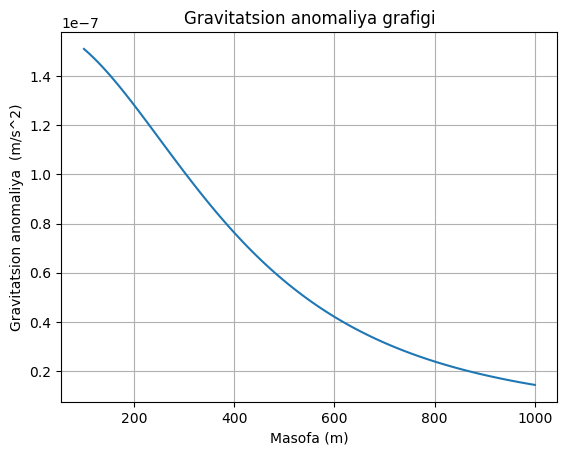

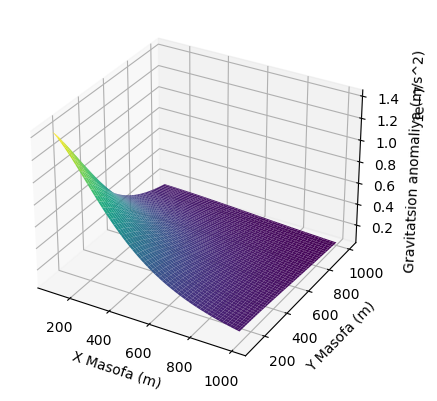

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

# Gravitatsion konstanta
G = 6.67430e-11

# O'lchov parametrlari
rho = 3000 # Zichlik (kg/m^3)
V =  1e8 # Hajm (m^3)
r = np.linspace(100, 1000, 100) # O'lchov nuqtalari masofasi(m)
z = 500 # Chuqurlik

# Gravitatsion anomaliyalrni hisoblash
delta_g = (G * rho * V) / (r**2 + z**2)**(3/2)

# Gravitastion anomaliya grafigi
plt.plot(r, delta_g)
plt.title('Gravitatsion anomaliya grafigi')
plt.xlabel('Masofa (m)')
plt.ylabel('Gravitatsion anomaliya  (m/s^2)')
plt.grid(True)
plt.show()

# 3D Vizualizatsiya uchun kod
from mpl_toolkits.mplot3d import Axes3D

# Kordinatalar
X, Y = np.meshgrid(r, r)
Z = (G * rho * V) / (X**2 + Y**2 + z**2)**(3/2)


# natijalarni 3D Shaklda tasvirlash
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('X Masofa (m)')
ax.set_ylabel('Y Masofa (m)')
ax.set_zlabel('Gravitatsion anomaliya (m/s^2)')

plt.show()


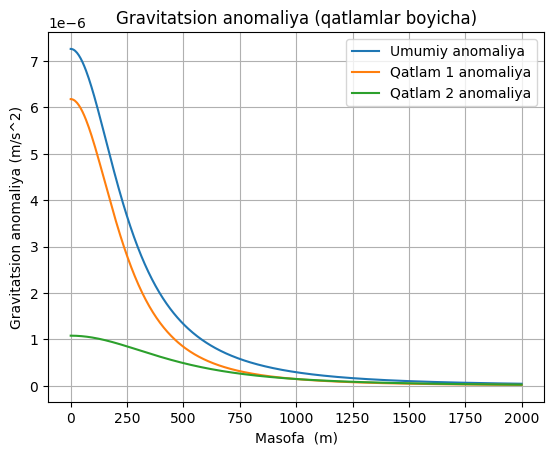

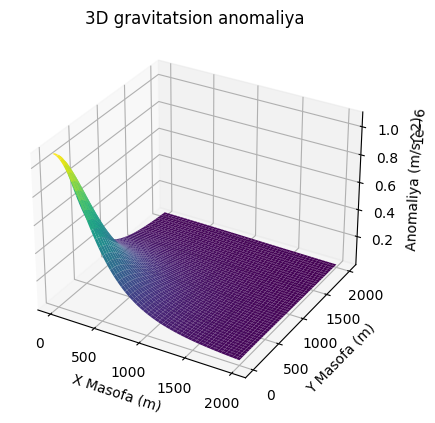

In [5]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# Gravimetrik parametrlar
G = 6.67430e-11
rho_1 = 2500 # Birinchi qatlam Zichligi (kg/m^3)
rho_2 = 3500 # Ikkinch qatlam Zichligi (kg/m^3)
V =  1e9 # Hajm (m^3)
r = np.linspace(0, 2000, 500) # O'lchov nuqtalari masofasi(m)
z_1 = 300 # Birinchi qatlam  Chuqurligi (m)
z_2 = 600  # Ikkinchi qatlam  Chuqurligi (m)

# Gravitatsion anomaliyalrni hisoblash
delta_g_1 = (G * rho_1 * V) / (r**2 + z_1**2)**(3/2)
delta_g_2 = (G * rho_2 * V) / (r**2 + z_2**2)**(3/2)

# Umumiy gravitatsion anomaliya 
delta_g_total = delta_g_1 + delta_g_2

# 2D Grafik chizish
plt.plot(r, delta_g_total, label='Umumiy anomaliya')
plt.plot(r, delta_g_1, label='Qatlam 1 anomaliya')
plt.plot(r, delta_g_2, label='Qatlam 2 anomaliya')
plt.xlabel('Masofa  (m)')
plt.ylabel('Gravitatsion anomaliya (m/s^2)')
plt.title('Gravitatsion anomaliya (qatlamlar boyicha)')
plt.legend()
plt.grid(True)
plt.show()


# 3D vizualizatsiya 
X, Y = np.meshgrid(r, r)
Z = (G * rho_2 * V) / (X**2 + Y**2 + z_2**2)**(3/2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title('3D gravitatsion anomaliya') 
ax.set_xlabel('X Masofa (m)')
ax.set_ylabel('Y Masofa (m)')
ax.set_zlabel('Anomaliya (m/s^2)')

plt.show()

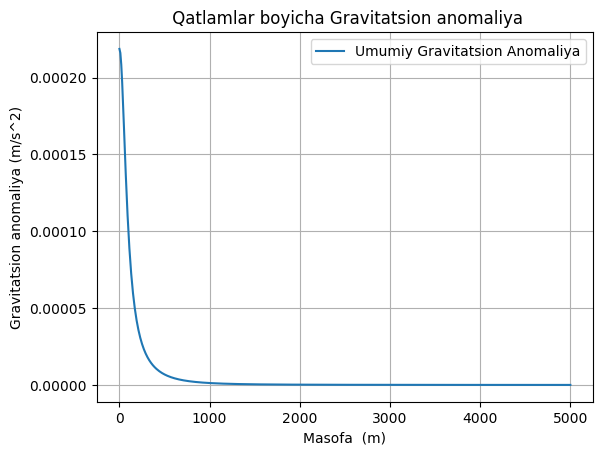

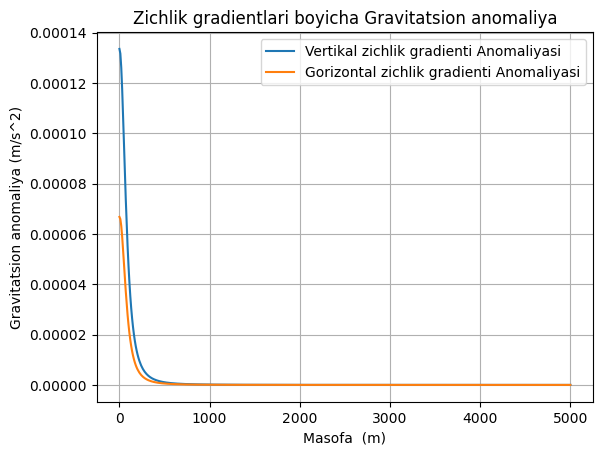

Tiklangan zichliklar:  [2300. 2400. 2500. 2600. 2700.]


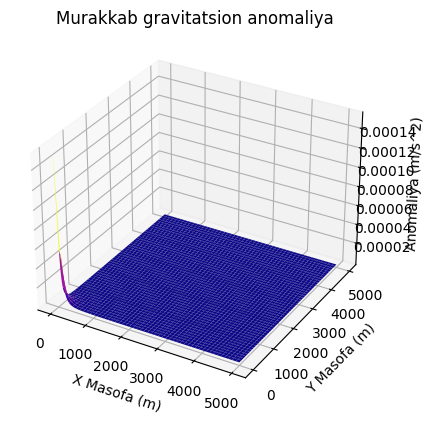

In [15]:
import numpy as np
import matplotlib.pyplot as plt 

# Gravimetrik parametrlar
G = 6.67430e-11

# Qatlamlar parametrlari (chuqurlik va zichlik)
n_layers = 5 # qtlamlar soni
depths = np.array([100, 200, 300, 400, 500]) # qatlamlar chuqurligi(m)
densities = np.array([2500, 2700, 2900, 3100, 3300]) # zichlik
volumes = np.array([1e9, 1.5e9, 1.2e9, 1.8e9, 2e9]) # hajmlar

# O'lchov masofasi
r = np.linspace(0, 5000, 500)

# Gravitatsion anomliyani hisoblash
delta_g_total = np.zeros_like(r)
for i in range(n_layers):
    delta_g_total += (G * densities[i] * volumes[i]) / (r**2 + depths[i]**2)**(3/2)
                      
# Graviatsion anomaliya grafigi
plt.plot(r, delta_g_total, label='Umumiy Gravitatsion Anomaliya')
plt.xlabel('Masofa  (m)')
plt.ylabel('Gravitatsion anomaliya (m/s^2)')
plt.title(' Qatlamlar boyicha Gravitatsion anomaliya')
plt.legend()
plt.grid(True)
plt.show()

# zichlik gradientlarini modellashtirish
z_gradient = np.linspace(2000, 3000, 500) # vertikal zichlik gradienti (kg/m^3)
r_gradient = np.linspace(1000, 2000, 500) # Gorizontal zichlik gradienti (kg/m^3)

# Har bir gradientga mos anomaliyalrni hisoblash 
delta_g_vert = (G * z_gradient * volumes[0]) / (r**2 + depths[0]**2)**(3/2)
delta_g_horz = (G * r_gradient * volumes[0]) / (r**2 + depths[0]**2)**(3/2)

# Modellashtirilgan zichlik anomlaiyalarini grafikda ko'rsatish
plt.plot(r, delta_g_vert, label='Vertikal zichlik gradienti Anomaliyasi')
plt.plot(r, delta_g_horz, label='Gorizontal zichlik gradienti Anomaliyasi')
plt.xlabel('Masofa  (m)')
plt.ylabel('Gravitatsion anomaliya (m/s^2)')
plt.title('Zichlik gradientlari boyicha Gravitatsion anomaliya')
plt.legend()
plt.grid(True)
plt.show()

from scipy.optimize import minimize

# Ma'lum o'lchovlar bo'yicha inversiya orqali zichlikni tiklash
def grav_inversion(params, r, g_obs):
    rho_model = params # Zichlik modelllarini kirgizish
    g_model = np.zeros_like(r)
    for i in range(n_layers):
        g_model += (G * rho_model[i]) * volumes[i] / (r**2 + depths[i]**2)**(3/2)
    return np.sum((g_obs - g_model)**2)

# Inversiya uchun dastlabki zichliklar
initial_rho = np.array([2300, 2400, 2500, 2600, 2700])

# Gravitatsion anomaliya ma'lumotlarini olish
g_obs = delta_g_total # biz kuzatgan malumotlar

# Inversiyani ishlatish
res = minimize(grav_inversion, initial_rho, args=(r, g_obs))
rho_inverted = res.x # Tiklangan zichliklar

print("Tiklangan zichliklar: ", rho_inverted)

# 3D vizualizatsiya 
from mpl_toolkits.mplot3d import Axes3D
X, Y = np.meshgrid(r, r)
Z = (G * rho_inverted[0] * volumes[0]) / (X**2 + Y**2 + depths[0]**2)**(3/2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='plasma')
ax.set_title('Murakkab gravitatsion anomaliya') 
ax.set_xlabel('X Masofa (m)')
ax.set_ylabel('Y Masofa (m)')
ax.set_zlabel('Anomaliya (m/s^2)')

plt.show()
